# Linear Regression

Linear regression is an approach we use to model the relationship between a scalar dependent variable y and one or more explanatory variables (aka independent variables) denoted by X. In machine learning parlance, these explanatory variables or predictors are called **features** and target or the dependent variable **labels**. Regression modesl are models which predict a continuous outcome.

**Univariate Regression**

The simplest possible relationship between two variables is a `univariate regression` when there is only one feature to be explained.

$$y_i \approx w_0 + w_1 x_i$$

If we can measure some $(x_i,y_i)$ pairs, we could calculate our model parameters $w_0$ and $w_1$. Then we could predict $y$ in the future based on $x$, or even try to influence $y$ in the future by controlling $x$. This is achieved by minimizing the mean squared error, 

$$L = \frac{1}{n}\sum_{i=1}^n \bigg( y_i - w_0 -\sum_{j=1}^p x_{ij}w_j \bigg)^2$$

**Multivariate Regression**

If there multiple features that are to be mapped to a target variable, then it is a `multivariate regression` problem.

$$ y_i \approx w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3 + \dots + w_n x_n $$

,or more generally

$$ y_i \approx \sum_j w_j X_{ij} $$

, where $i$ labels different **observations** and $j$ labels different **features**.

## The workflow

We'll employ the following linear regressor from scikit-learn for median home price prediction.

- Linear Regression
- Lasso Regression
- Ridge Regression
- Elastic Net Regression



| Steps  | Workflow                  | Remarks                                                     |
| ------ | ------------------------- | ----------------------------------------------------------- |
| Step 1 | Ideation                  | Predict next trading day index price from the given dataset |
| Step 2 | Data Collection           | Load the dataset from                                       |
| Step 3 | Exploratory Data Analysis | Study summary statistics                                    |
| Step 4 | Cleaning Dataset          | Data already cleaned, no further imputation required        |
| Step 5 | Transformation            | Perform feature scaling based on EDA                        |
| Step 6 | Modeling                  | Building and training linear regressor                      |
| Step 7 | Metrics                   | Validating the model performance using score method         |



In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

# Regressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# Metrics
from sklearn.metrics import mean_squared_error

# set display options
pd.options.display.float_format = "{:,.2f}".format

# Ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
import yfinance as yf

df = yf.download('^GSPC') # retrive the S&P500 data from yahoo finance
df = df.loc['2000':]
# df.to_csv('SP500.csv')
df


############################
# Here below is the Lab's Example

# # load nifty index data
# df = pd.read_csv('./niftyindex.csv', 
#                  index_col=0, 
#                  dayfirst=True)
# df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,"1,469.25","1,478.00","1,438.36","1,455.22","1,455.22",931800000
2000-01-04,"1,455.22","1,455.22","1,397.43","1,399.42","1,399.42",1009000000
2000-01-05,"1,399.42","1,413.27","1,377.68","1,402.11","1,402.11",1085500000
2000-01-06,"1,402.11","1,411.90","1,392.10","1,403.45","1,403.45",1092300000
2000-01-07,"1,403.45","1,441.47","1,400.73","1,441.47","1,441.47",1225200000
...,...,...,...,...,...,...
2023-04-18,"4,164.26","4,169.48","4,140.36","4,154.87","4,154.87",3536640000
2023-04-19,"4,139.33","4,162.57","4,134.49","4,154.52","4,154.52",3572560000
2023-04-20,"4,130.48","4,148.57","4,114.57","4,129.79","4,129.79",3772080000


## EDA of Original dataset

In [3]:
# descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,"5,864.00","1,901.79",989.82,679.28,"1,186.47","1,438.98","2,430.90","4,804.51"
High,"5,864.00","1,913.18",995.05,695.27,"1,193.01","1,448.93","2,439.70","4,818.62"
Low,"5,864.00","1,889.48",984.19,666.79,"1,178.79","1,430.45","2,416.11","4,780.04"
Close,"5,864.00","1,902.03",989.99,676.53,"1,186.12","1,439.28","2,429.35","4,796.56"
Adj Close,"5,864.00","1,902.03",989.99,676.53,"1,186.12","1,439.28","2,429.35","4,796.56"
Volume,"5,864.00","3,310,540,059.69","1,523,177,238.17","356,070,000.00","1,999,507,500.00","3,419,775,000.00","4,164,272,500.00","11,456,230,000.00"


## Cleaning & Imputation

Data is already cleaned. No further processing or imputation required.

In [4]:
# check for missing values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Feature Engineering

Features are also known as an independent variable which are used to determine the value of the target variable. We will create features and target (label) from the raw dataset.

In [5]:
# create features
def create_features(frame):
    df = frame.copy()
    multiplier = 2

    # spy features
    df['OC'] = df['Close'] / df['Open'] - 1
    df['HC'] = df['High'] / df['Low'] - 1
    df['GAP'] = df['Open'] / df['Close'].shift(1) - 1
    df['RET'] = np.log(df['Close'] / df['Close'].shift(1)) # return of the stock
    
    for i in [3]: # three-day rolling sum or mean
        # the only element in this loop is 3 as an int
        # but 3 is reform to be a string and build the column name
        df['RET' + str(i)] = df['RET'].rolling(i).sum()
        df['MA' + str(i)] = df['Close'] / df['Close'].rolling(i).mean() 
        df['OC'+ str(i)] = df['OC'].rolling(i).mean() 
        df['HC'+ str(i)] = df['HC'].rolling(i).mean() 
        df['GAP'+ str(i)] = df['GAP'].rolling(i).mean()
        df['STD'+ str(i)] = df['RET'].rolling(i).std()
        # like the Confidence Interval
        df['UB'+str(i)] = df['Close'].rolling(i).mean() + df['Close'].rolling(i).std() * multiplier 
        df['LB'+str(i)] = df['Close'].rolling(i).mean() - df['Close'].rolling(i).std() * multiplier
    
    # Label(Y) is the next-day stock price
    df['Label'] = df['Close'].shift(-1)
    
    # drop NaN values
    df.dropna(inplace=True)
    return df

In [6]:
# features
df = create_features(df)
display(df.shape)

# drop OHLCV and Labels 
X = df.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Label'], axis=1)
X

/Users/mie/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(5860, 19)

,Adj Close,OC,HC,GAP,RET,RET3,MA3,OC3,HC3,GAP3,STD3,UB3,LB3
Date,,,,,,,,,,,,,
2000-01-06,"1,403.45",0.00,0.01,0.00,0.00,-0.04,1.00,-0.01,0.03,0.00,0.02,"1,405.76","1,397.56"
2000-01-07,"1,441.47",0.03,0.03,0.00,0.03,0.03,1.02,0.01,0.02,0.00,0.01,"1,460.37","1,370.98"
2000-01-10,"1,457.60",0.01,0.02,0.00,0.01,0.04,1.02,0.01,0.02,0.00,0.01,"1,489.78","1,378.57"
2000-01-11,"1,438.56",-0.01,0.02,0.00,-0.01,0.02,0.99,0.01,0.02,0.00,0.02,"1,466.39","1,425.36"
2000-01-12,"1,432.25",-0.00,0.01,0.00,-0.00,-0.01,0.99,-0.00,0.01,0.00,0.01,"1,469.20","1,416.41"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-17,"4,151.32",0.00,0.01,-0.00,0.00,0.01,1.00,0.00,0.01,0.00,0.01,"4,158.89","4,131.23"
2023-04-18,"4,154.87",-0.00,0.01,0.00,0.00,0.00,1.00,0.00,0.01,0.00,0.00,"4,166.14","4,129.75"
2023-04-19,"4,154.52",0.00,0.01,-0.00,-0.00,0.00,1.00,0.00,0.01,-0.00,0.00,"4,157.48","4,149.66"


## Target or Label Definition

Label or the target variable is also known as the dependent variable. Here, the target variable is the closing price of the index the next trading day.

In [7]:
# label 
y = np.array(df['Label'])
y

array([1441.4699707 , 1457.59997559, 1438.56005859, ..., 4129.79003906,
       4133.52001953, 4137.04003906])

## Feature Selection

Reduce the number of input variables that are believed to be most useful to a model. We use correlation measures which is one the filter methods to address multicollinearity among features.

In [8]:
X.corr()

,Adj Close,OC,HC,GAP,RET,RET3,MA3,OC3,HC3,GAP3,STD3,UB3,LB3
Adj Close,1.00,0.01,-0.15,0.04,0.02,0.04,0.03,0.01,-0.17,0.07,-0.10,1.00,1.00
OC,0.01,1.00,-0.08,0.21,0.97,0.53,0.86,0.55,-0.01,0.12,0.03,-0.00,-0.00
HC,-0.15,-0.08,1.00,-0.08,-0.10,-0.28,-0.18,-0.24,0.88,-0.17,0.75,-0.13,-0.17
GAP,0.04,0.21,-0.08,1.00,0.45,0.26,0.38,0.11,-0.05,0.59,-0.05,0.03,0.03
RET,0.02,0.97,-0.10,0.45,1.00,0.55,0.89,0.53,-0.03,0.27,0.01,0.00,0.01
RET3,0.04,0.53,-0.28,0.26,0.55,1.00,0.75,0.96,-0.19,0.43,-0.13,0.02,0.03
MA3,0.03,0.86,-0.18,0.38,0.89,0.75,1.00,0.72,-0.08,0.33,-0.03,0.01,0.01
OC3,0.01,0.55,-0.24,0.11,0.53,0.96,0.72,1.00,-0.14,0.18,-0.08,0.00,0.01
HC3,-0.17,-0.01,0.88,-0.05,-0.03,-0.19,-0.08,-0.14,1.00,-0.15,0.84,-0.16,-0.19
GAP3,0.07,0.12,-0.17,0.59,0.27,0.43,0.33,0.18,-0.15,1.00,-0.14,0.06,0.07


Text(0.5, 1.0, 'Features Set Correlations')

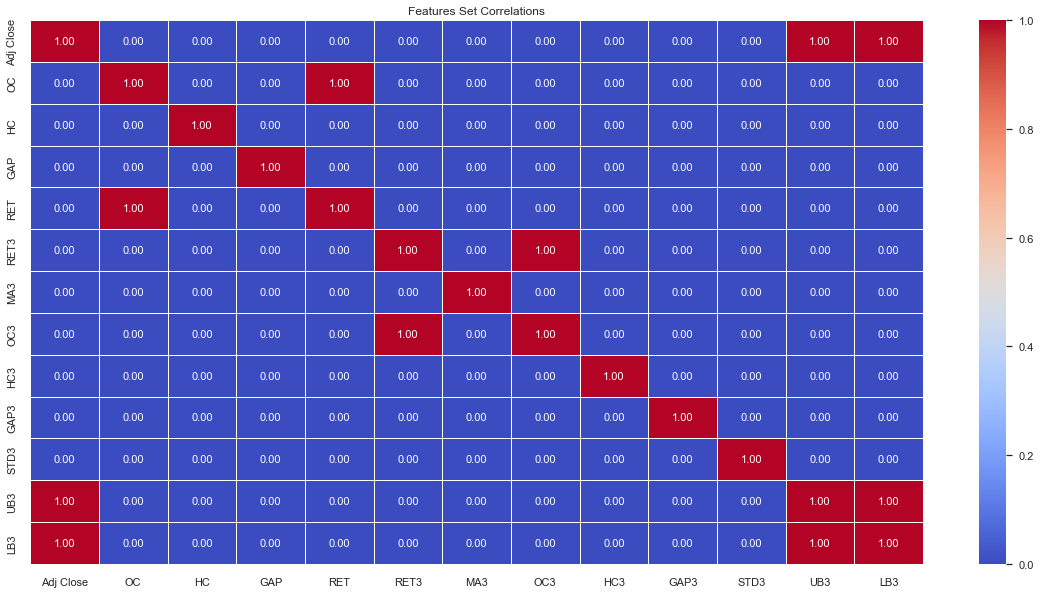

In [9]:
# remove features that are highly correlated
sns.set(rc={'figure.figsize': (20, 10)})

sns.heatmap(X.corr()>0.9, 
            annot=True,  
            annot_kws={"size": 11}, 
            fmt=".2f", 
            linewidth=.5, 
            cmap="coolwarm", 
            cbar=True); #cmap="crest", virids, magma

plt.title('Features Set Correlations')

In [10]:
# drop the highly correlated features
to_drop = ['LB3', 'UB3', 'OC', 'OC3']
X.drop(to_drop, axis=1, inplace=True)

# record feature names
feature_names = X.columns

# display the features set 
X

,Adj Close,HC,GAP,RET,RET3,MA3,HC3,GAP3,STD3
Date,,,,,,,,,
2000-01-06,"1,403.45",0.01,0.00,0.00,-0.04,1.00,0.03,0.00,0.02
2000-01-07,"1,441.47",0.03,0.00,0.03,0.03,1.02,0.02,0.00,0.01
2000-01-10,"1,457.60",0.02,0.00,0.01,0.04,1.02,0.02,0.00,0.01
2000-01-11,"1,438.56",0.02,0.00,-0.01,0.02,0.99,0.02,0.00,0.02
2000-01-12,"1,432.25",0.01,0.00,-0.00,-0.01,0.99,0.01,0.00,0.01
...,...,...,...,...,...,...,...,...,...
2023-04-17,"4,151.32",0.01,-0.00,0.00,0.01,1.00,0.01,0.00,0.01
2023-04-18,"4,154.87",0.01,0.00,0.00,0.00,1.00,0.01,0.00,0.00
2023-04-19,"4,154.52",0.01,-0.00,-0.00,0.00,1.00,0.01,-0.00,0.00


## EDA for Feature Scaling

The choice of scaling techniques to be used should come from the Exploratory Data Analysis of features set.

In [11]:
# decide which scaling to use
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Adj Close,"5,860.00","1,901.89",989.84,676.53,"1,185.89","1,439.28","2,429.35","4,796.56"
HC,"5,860.00",0.01,0.01,0.00,0.01,0.01,0.02,0.12
GAP,"5,860.00",0.00,0.00,-0.07,-0.00,0.00,0.00,0.05
RET,"5,860.00",0.00,0.01,-0.13,-0.00,0.00,0.01,0.11
RET3,"5,860.00",0.00,0.02,-0.15,-0.01,0.00,0.01,0.16
MA3,"5,860.00",1.00,0.01,0.92,1.00,1.00,1.00,1.07
HC3,"5,860.00",0.01,0.01,0.00,0.01,0.01,0.02,0.11
GAP3,"5,860.00",0.00,0.00,-0.03,-0.00,0.00,0.00,0.02
STD3,"5,860.00",0.01,0.01,0.00,0.00,0.01,0.01,0.12


# Regression Class

We'll now create a Regression class for linear estimators : Linear, Lasso, Ridge and ElasticNet

In [12]:
class Regression:
    def __init__(self, X, y, testsize=0.20):

        self.X = X
        self.y = y
        self.testsize = testsize
        
        # split training and testing dataset
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, 
                                                                                self.y, 
                                                                                test_size=self.testsize, 
                                                                                random_state=0, 
                                                                                shuffle=False)
    
    # fit and predict
    def fit_predict(self, estimator, transformer, alpha=None, l1_ratio=None):
        
        try:
            # subsume estimators and transformer into a pipeline
            model = Pipeline( [('scaler', transformer), ('regressor', estimator)] )

            # fit/train model
            model.fit(self.X_train, self.y_train)

            # predict lables
            y_pred = model.predict(self.X_test)

        except Exception as e:
            print(str(e))

        return model, model['regressor'].intercept_, model['regressor'].coef_, y_pred

    # evaluate metrics
    def eval_metrics(self,model, y_pred):

        # evaluate metrics
        mse = mean_squared_error(self.y_test, y_pred, squared=True)
        rmse = mean_squared_error(self.y_test, y_pred, squared=False)
        r2train = model.score(self.X_train, self.y_train)
        r2test = model.score(self.X_test, self.y_test)

        return mse, rmse, r2train, r2test

    # plot coefficients as a function of lambda - the hyper-parameter of the penalty term
    def plot_coeff(self, modelname):

        coef = []
        model = Regression(self.X, self.y, 0.20)
        alpha_range = np.logspace(2, -2, 200) 
        # lambda term is set in logspace, 10**i  ,where i is in linespace of (2,-2,200)

        if modelname == 'Lasso':
            for i in alpha_range:    
                coef.append(model.fit_predict(Lasso(alpha=i, random_state=0), MinMaxScaler())[2]) # we store the coeff

        elif modelname == 'Ridge':
            alpha_range = np.logspace(6, -2, 200)
            for i in alpha_range:    
                coef.append(model.fit_predict(Ridge(alpha=i, random_state=0), MinMaxScaler())[2])

        elif modelname == 'ElasticNet':
            for i in alpha_range:    
                coef.append(model.fit_predict(ElasticNet(alpha=i, random_state=0), MinMaxScaler())[2])
        
        # Plot Coefficients
        fig = plt.figure(figsize=(20,8))
        ax = plt.axes()
        
        ax.plot(alpha_range, coef)
        ax.set_xscale('log')
        ax.legend(feature_names, loc=0)
        # ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
        ax.set_title(f'{modelname} coefficients as a function of the regularization')
        ax.set_xlabel('$\lambda$')
        ax.set_ylabel('$\mathbf{w}$')

        return plt.show()

## Linear Regression

In linear regression, the model coefficients are selected by minimizing a loss function. First, we instantiate the class object and pass the estimator and transformer to fit and predict the model.

In [13]:
# instantiate 
lr = Regression(X, y)

# fit Linear Regression
lr_model , lr_intercept, lr_coef, lr_y_pred = lr.fit_predict(LinearRegression(), MinMaxScaler())
lr_model , lr_intercept, lr_coef, lr_y_pred

(Pipeline(steps=[('scaler', MinMaxScaler()), ('regressor', LinearRegression())]),
 683.219500543735,
 array([ 2.19795791e+03,  1.63820525e+00, -4.53869513e+00,  1.37094260e+01,
         2.99117289e+00, -3.37598020e+01,  5.59233768e+00,  5.66752810e+00,
        -3.75919939e+00]),
 array([2875.02628111, 2896.66342217, 2898.6321523 , ..., 4157.12847367,
        4132.48085293, 4134.65530177]))

# Regularized Regression

If the coeficients are too large in linear regression, it can lead to overfitting the model. We do regularization to over come such issues that penalises large coefficients. Lasso and Ridge regression are penalty regression that prevent over-fitting from the simple linear regression.

## LASSO - with L1 norm Penalty

The Least Absolute Shrinkage and Selection Operator (LASSO) is a variation of linear regression. In Lasso, the loss function is minimized by limiting the sum of absolute values of the model coefficients where the L1 penalty term is added to the Mean Square Error (MSE). The L1 penalty term not only shrinks the coefficents, but shrinks some of them to zero and that is very useful for feature selection. 

$$ L = \frac{1}{n}\sum_{i=1}^n \bigg( y_i - w_0 -\sum_{i=1}^p x_{ij} w_j \bigg)^2 + \lambda \sum_{j=1}^p |w_j| $$

, where $\lambda$ is the **regularisation penalty**.

In [14]:
# instantiate 
lasso = Regression(X,y)

# fit Lasso 
lasso_model , lasso_intercept, lasso_coef, lasso_y_pred = lasso.fit_predict(Lasso(alpha=0.3, random_state=0), MinMaxScaler())
lasso_model , lasso_intercept, lasso_coef, lasso_y_pred

(Pipeline(steps=[('scaler', MinMaxScaler()),
                 ('regressor', Lasso(alpha=0.3, random_state=0))]),
 678.794480524156,
 array([2191.01452666,   -0.        ,   -0.        ,   -0.        ,
          -0.        ,   -0.        ,   -0.        ,    0.        ,
          -0.        ]),
 array([2871.6244188 , 2893.62100191, 2894.39913984, ..., 4148.35123733,
        4123.68122072, 4127.40215694]))

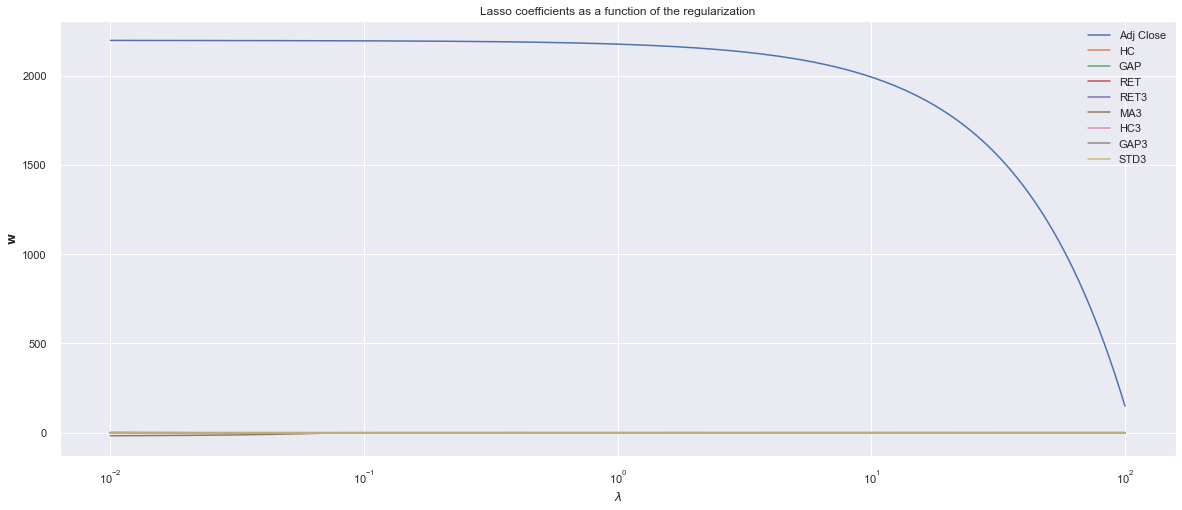

In [15]:
# plot coefficients
lasso.plot_coeff('Lasso')

## Ridge - with L2 norm Penalty

In ridge regression, the cost function is altered by adding a L2 penality equivalent to square of the magnitude of the coefficients. The Ridge regression shrinks the coefficients and helps to reduce the multi-collinearity. As seen from the above graph, when $\lambda \to 0$, the cost function becomes similar to the linear regression cost function.

$$ L = \frac{1}{n} \sum_{i=1}^n \bigg( y_i - w_0 -\sum_{j=1}^p x_{ij}w_j \bigg)^2 + \lambda \sum_{j=1}^p w_j^2 $$

In [16]:
# instantiate 
ridge = Regression(X,y)

# fit Ridge 
ridge_model , ridge_intercept, ridge_coef, ridge_y_pred = ridge.fit_predict(Ridge(alpha=1, random_state=0), StandardScaler())
ridge_model , ridge_intercept, ridge_coef, ridge_y_pred

(Pipeline(steps=[('scaler', StandardScaler()),
                 ('regressor', Ridge(alpha=1, random_state=0))]),
 1481.308421411612,
 array([ 4.85474140e+02,  1.50157514e-01, -2.33480652e-01,  8.04513693e-01,
         1.90548988e-01, -2.13155185e+00,  4.17657561e-01,  3.45631339e-01,
        -2.87357507e-01]),
 array([2874.71524034, 2896.37238512, 2898.35006674, ..., 4156.44330548,
        4131.76828373, 4133.93236467]))

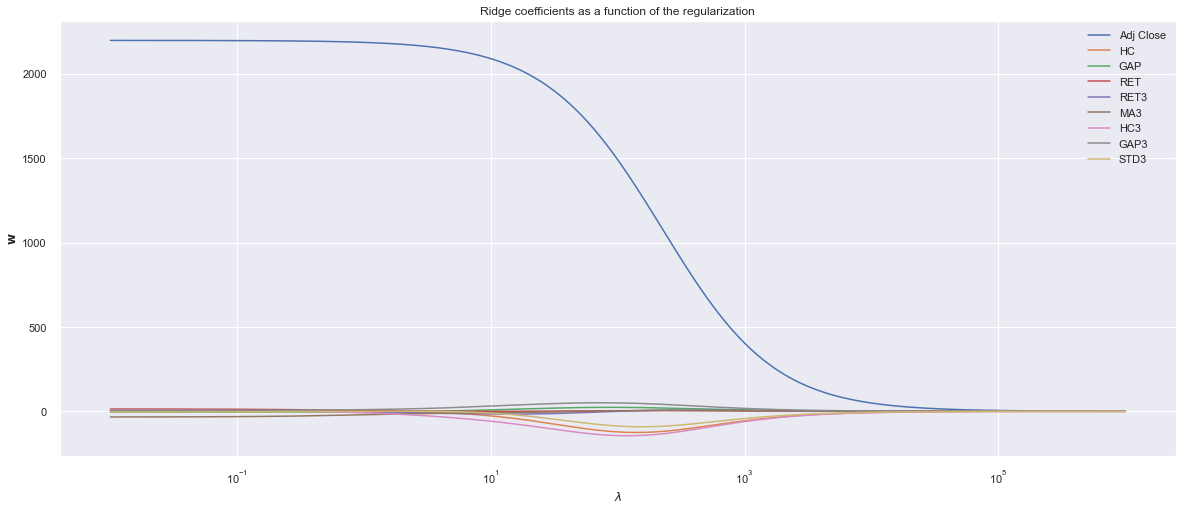

In [17]:
# plot coefficients
ridge.plot_coeff('Ridge')

## ElasticNet Regression

ElasticNet combines the properties of both Lasso and Ridge regression. It penalizes the model using both the L1 and L2 norm. 

$$ L = \frac{1}{n} \sum_{i=1}^n \bigg( y_i - w_0 -\sum_{j=1}^p x_{ij}w_j \bigg)^2 + \lambda \bigg( \frac{1-\alpha}{2}\sum_{j=1}^p w_j^2 + \alpha \sum_{j=1}^p |w_j| \bigg)$$

In [18]:
# instantiate 
elasticnet = Regression(X,y)

# fit ElasticNet
elasticnet_model , elasticnet_intercept, elasticnet_coef, elasticnet_y_pred = elasticnet.fit_predict(ElasticNet(alpha=0.1, l1_ratio=1e-10, random_state=0), StandardScaler())
elasticnet_model , elasticnet_intercept, elasticnet_coef, elasticnet_y_pred

(Pipeline(steps=[('scaler', StandardScaler()),
                 ('regressor',
                  ElasticNet(alpha=0.1, l1_ratio=1e-10, random_state=0))]),
 1481.308421411612,
 array([ 4.33116378e+02, -4.40190548e+00,  4.36433926e-01,  9.68481003e-01,
        -4.07341971e+00, -3.45582650e-01, -1.62952893e+01,  6.14206508e+00,
         7.57175042e-01]),
 array([2745.40157531, 2773.70793589, 2779.64827524, ..., 3877.30572463,
        3841.22204533, 3842.3180832 ]))

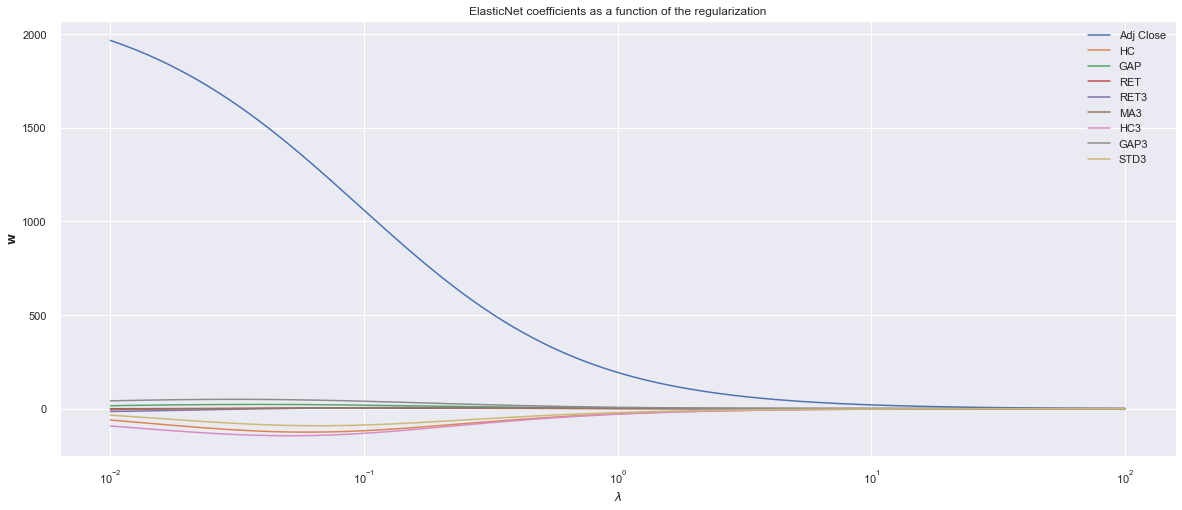

In [19]:
# plot coefficients
elasticnet.plot_coeff('ElasticNet')

# Model Comparision

In [20]:
# compare model coefficients
coef_df = pd.DataFrame({
    'LR': lr_coef,
    'Lasso': lasso_coef,
    'Ridge': ridge_coef,
    'ElasticNet': elasticnet_coef
}, index = feature_names)

coef_df

,LR,Lasso,Ridge,ElasticNet
Adj Close,"2,197.96","2,191.01",485.47,433.12
HC,1.64,-0.00,0.15,-4.40
GAP,-4.54,-0.00,-0.23,0.44
RET,13.71,-0.00,0.80,0.97
RET3,2.99,-0.00,0.19,-4.07
MA3,-33.76,-0.00,-2.13,-0.35
HC3,5.59,-0.00,0.42,-16.30
GAP3,5.67,0.00,0.35,6.14
STD3,-3.76,-0.00,-0.29,0.76


In [21]:
# compare evaluation metrics
eval_df = pd.DataFrame({
    'LR': lr.eval_metrics(lr_model, lr_y_pred),
    'Lasso': lasso.eval_metrics(lasso_model, lasso_y_pred),
    'Ridge': ridge.eval_metrics(ridge_model, ridge_y_pred),
    'ElasticNet': elasticnet.eval_metrics(elasticnet_model, elasticnet_y_pred)
}, index = ['MSE', 'RMSE', 'R2_train', 'R2_test'])

eval_df

,LR,Lasso,Ridge,ElasticNet
MSE,"2,163.09","2,207.24","2,161.82","58,450.24"
RMSE,46.51,46.98,46.50,241.76
R2_train,1.00,1.00,1.00,0.99
R2_test,0.99,0.99,0.99,0.86
